In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

,num,age,log(Te),log(L/Lo),Xc,Yc,Lg/L,rhoc,Tc,Radius,...,Dif,alpha,over,Rconv,Z,X,Mass,DPl1,Mover,m(he)
0,1,251.887,3.59102,2.29569,0.689,0.2843,1.0,0.000567,412017.0,30.7932,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.095310e+09,1.0,0.0
1,2,478.971,3.59310,2.26856,0.689,0.2843,1.0,0.000635,428097.0,29.5621,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,1.026890e+09,1.0,0.0
2,3,730.051,3.59516,2.24145,0.689,0.2843,1.0,0.000712,444778.0,28.3834,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,9.626770e+08,1.0,0.0
3,4,1007.850,3.59719,2.21431,0.689,0.2843,1.0,0.000798,462097.0,27.2540,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.961590e+08,1.0,0.0
4,5,1314.930,3.59921,2.18721,0.689,0.2843,1.0,0.000894,480068.0,26.1723,...,0.0,1.8,0.05,0.0,0.0267,0.689,2.982710e+33,8.342960e+08,1.0,0.0


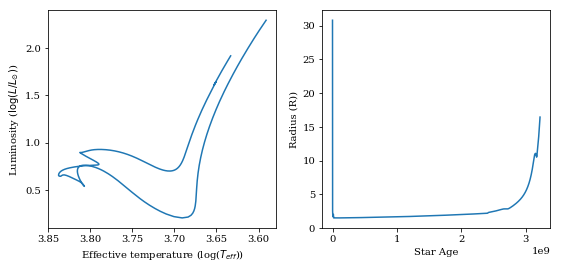

In [2]:
folder = "../../../../../Volumes/My Passport/NGC6819/"

file = "M1.50.X0.689.Z0.0267/M1.50.X0.689.Z0.0267-sum.txt"

df = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, 
                 names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                        'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])
display(df.head())

plt.figure(1, figsize=(9,4))
plt.subplot(121)
plt.plot(df['log(Te)'], df['log(L/Lo)'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.gca().invert_xaxis()
plt.xlabel('Effective temperature (log($T_{eff}$))')
plt.ylabel('Luminosity ($\log(L/L_{\odot})$)')
plt.subplot(122)
plt.plot(df['age'], df['Radius'])
plt.xlabel('Star Age')
plt.ylabel('Radius (R))')
plt.show()

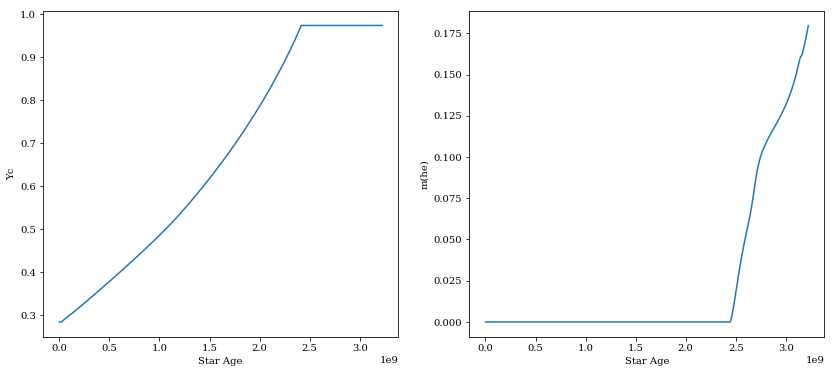

In [3]:
plt.figure(1, figsize=(14,6))
plt.subplot(121)
plt.plot(df['age'], df['Yc'])
#plt.plot(df.loc[(df.log_R > 0.3)].log_Teff, df.loc[(df.log_R > 0.3)].log_L)
plt.xlabel('Star Age')
plt.ylabel('Yc')

plt.subplot(122)
plt.plot(df['age'], df['m(he)'])
plt.xlabel('Star Age')
plt.ylabel('m(he)')
plt.show()

0.2843 0.28430000000000005


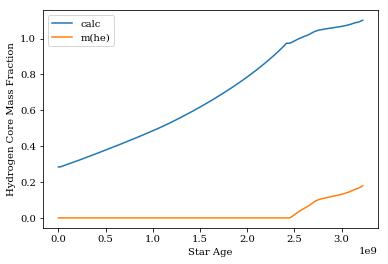

In [4]:
#Y = (df['Yc']*df['m(he)']/1.4)+(1-df['X']-df['Z'])*((1.4-df['m(he)'])/1.4)
print(min(df['Yc']), 1-min(df['X'])-min(df['Z']))
Y = df['Yc']+df['m(he)']/1.4
plt.plot(df['age'], Y, label='calc')
plt.plot(df['age'], df['m(he)'], label='m(he)')
plt.xlabel('Star Age')
plt.ylabel('Hydrogen Core Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
#print(max(df['age']))
#plt.xlim(2.2e9)
plt.legend()

(0, 17.5)

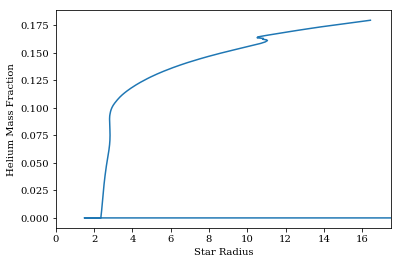

In [5]:
plt.plot(df['Radius'], df['m(he)'])
plt.xlabel('Star Radius')
plt.ylabel('Helium Mass Fraction')
#print('Initial Mass = 1.0 Msol, Initial Helium Fraction = 0.24, Metallicity = +0.00')
#print('Helium increases from ', min(df['total_mass_he4']), ' to ', max(df['total_mass_he4']))
#plt.plot(df['star_age'], df['he_core_mass'])
plt.xlim([0, 17.5])

In [6]:
#Import output data
output = pd.read_csv('../data/output_back_filesremoved.csv', usecols=[1,11,24])
#Import APOKASC data
df_met = pd.read_csv('../data/APOKASC2.txt', delim_whitespace=True, usecols=np.arange(0,31))
#Import star classifications
df_class = pd.read_csv('../data/RGclassification.txt', header=None, delim_whitespace=True, names=['KIC', 'type'])
#Import stan fitted star parameters
df_stanstars = pd.read_csv('../data/stanfits/ngc6819_tau.csv', names = ['KIC', 'dnu',
                                         'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df_stanstars['KIC'] = df_stanstars['KIC'].astype(int)
df_met.head()

,KIC,2MASS,Teff,S_Teff,FeH,S_FeH,Afe,S_Afe,Nmax,S_Nmax,...,Logg(seis),S_Gran,S_Gsys,<Rho>,S_Rrhoran,S_Rhosys,LogAge,S_LogageP,S_LogageM,Av
0,1027110,2M19250937+3644599,4177.6,51.8,-0.232,0.025,0.205,0.015,6.496,0.015,...,1.692,0.007,0.007,1.082E-04,0.058,0.008,4.002,0.205,-0.189,0.269
1,1027337,2M19252021+3647118,4636,67.3,0.275,0.024,0.023,0.01,73.975,0.009,...,2.772,0.005,0.007,4.029E-03,0.026,0.007,3.798,0.099,-0.09,0.214
2,1160789,2M19233280+3652207,4729.6,72.3,-0.257,0.034,0.188,0.015,25.209,0.015,...,2.308,0.007,0.01,9.635E-04,0.069,0.008,3.889,0.133,-0.146,0.009
3,1160986,2M19234825+3649476,4339.7,61.4,0.135,0.022,0.029,0.012,...,...,...,...,...,...,...,...,...,...,...,...,No
4,1161447,2M19241746+3651460,4776.1,86.2,0.058,0.029,-0.006,0.013,37.066,0.027,...,2.478,0.012,0.01,1.340E-03,0.052,0.008,3.396,0.166,-0.145,0.4


In [18]:
#display(df_met.KIC)
#display(df_stanstars.KIC)
print(len(df_stanstars.KIC))
metap = []
masap = []
agap = []
df_dropped = df_stanstars
for i in df_stanstars.KIC:
    if i in df_met.KIC.values:
        metap.append(float(df_met.loc[df_met.KIC == i]['FeH'].values[0]))
        masap.append(float(df_met.loc[df_met.KIC == i]['M(cor)'].values[0]))
        agap.append(float(df_met.loc[df_met.KIC == i]['LogAge'].values[0]))
    else:
        
        df_dropped = df_dropped.drop(df_stanstars.loc[df_stanstars.KIC == i].index)

print(len(df_dropped))
df_dropped['met'] = metap
df_dropped['mass'] = masap
df_dropped['logage'] = agap
df_dropped = df_dropped.drop([38])
df_dropped.head(200)
print(min(df_dropped.met), max(df_dropped.met))
df_dropped.sort_values(by=['mass'])

49
39
-0.093 0.196


,KIC,dnu,numax,epsilon,alpha,A,G,phi,tau,met,mass,logage
43,4937011,4.027830,28.342735,-0.094978,0.028458,0.018673,2.945413,-2.900511,NaN,0.089,0.643,4.177
14,5023889,5.160895,53.345537,0.082969,0.012298,0.024152,2.716371,1.287949,10.117949,0.196,1.346,3.645
13,5024043,5.351381,54.204717,0.104270,0.011104,0.021776,2.572025,-3.528075,10.101332,-0.093,1.350,3.541
1,5024240,11.986175,154.019794,0.238324,0.009100,0.013468,3.164068,2.036424,10.758115,0.004,1.365,3.542
46,5024750,1.785401,14.083255,-0.195692,0.028514,0.085051,2.496492,-2.992992,NaN,0.090,1.420,3.531
36,5112734,4.110666,34.147752,-0.001838,0.014010,0.029526,2.899217,-0.226830,10.181534,0.139,1.428,3.529
48,5112481,0.891429,6.138924,-0.213071,0.007844,0.220888,2.446965,-1.319699,NaN,0.090,1.450,3.495
15,5111940,4.888010,49.651466,0.043628,0.013536,0.026345,2.496897,1.121739,9.417936,0.130,1.457,3.498
28,5112938,4.660716,43.188849,0.018034,0.011095,0.026207,3.098236,-0.217527,10.922146,0.119,1.544,3.329
31,5112373,4.663817,44.425883,-0.121714,-0.005573,0.009577,2.759017,2.306191,NaN,0.114,1.547,3.330


In [19]:
Masses = np.arange(1.40, 1.75, 0.01)
MetHe = ['X0.674.Z0.0329', 'X0.689.Z0.0267', 'X0.701.Z0.0216', 'X0.711.Z0.0174', 
         'X0.719.Z0.0140', 'X0.725.Z0.0112', 'X0.730.Z0.0090']

Xsol = 0.7381
Zsol = 0.0134
FeH = []
for i in MetHe:
    x = float(i[1:6])
    z = float(i[8:14])
    FeH.append(np.log10(z/x)-np.log10(Zsol/Xsol))
FeH
#print(Masses)

[0.4295464083770639,
 0.329302446419359,
 0.22974614014668182,
 0.12969005451524285,
 0.030409552257764982,
 -0.07010957693840258,
 -0.16806994371872164]

Text(0, 0.5, 'Glitch Amplitude')

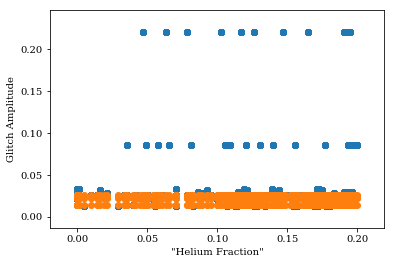

In [20]:
Y_mas = []
A_mas = []
Y_met = []
A_met = []
for i in Masses:
    for j in MetHe: 
        for k in FeH:
            file = "M" + str('%.2f' % i) + "." + j + "/M" + str('%.2f' % i) + "." + j + "-sum.txt"
            #print(file)
            df1 = pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, dtype = float,
                         names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                                'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)'])

            masses = df_dropped.mass.values
            mass1 = min(masses, key=lambda l:abs(l-i))
            A_mas.append(df_dropped.loc[df_dropped.mass == mass1].A.values[0])

            age_mas = float(1000000*10**df_dropped.loc[df_dropped.mass == mass1].logage.values[0])
            ages_mas = df1.age.values
            age1 = min(ages_mas, key=lambda l:abs(l-age_mas))

            Y_mas.append(df1.loc[df1['age'] == age1]['m(he)'].values[0])

            metses = df_dropped.met.values
            met1 = min(metses, key=lambda l:abs(l-k))
            A_met.append(df_dropped.loc[df_dropped.met == met1].A.values[0])

            age_met = float(1000000*10**df_dropped.loc[df_dropped.mass == mass1].logage.values[0])
            ages_met = df1.age.values
            age2 = min(ages_met, key=lambda l:abs(l-age_met))

            Y_met.append(df1.loc[df1['age'] == age2]['m(he)'].values[0])

plt.scatter(Y_mas, A_mas)
plt.scatter(Y_met, A_met)
plt.xlabel('"Helium Fraction"')
plt.ylabel('Glitch Amplitude')


In [21]:
#Set ranges to find fitted stars in
masrng = 0.6
metrng = 0.08
met=0
dfs=[]
IDs = []
nstars = 0
for i,j,k in zip(Masses, MetHe, FeH):
    file = "M" + str('%.2f' % i) + "." + j + "/M" + str('%.2f' % i) + "." + j + "-sum.txt"
    dfs.append(pd.read_csv(folder+file, skiprows=3, delim_whitespace=True, dtype = float,
                 names=['num', 'age', 'log(Te)', 'log(L/Lo)', 'Xc', 'Yc', 'Lg/L', 'rhoc', 'Tc', 'Radius', 'Mnc', 
                        'logg', '(Z/X)_s', 'Dif', 'alpha', 'over', 'Rconv', 'Z', 'X', 'Mass', 'DPl1', 'Mover', 'm(he)']))
    IDs.append(df_dropped.loc[(df_dropped['mass'] <= i+masrng) & (df_dropped['mass'] >= i-masrng) & 
                        (df_dropped['met'] <= k+metrng) &(df_dropped['met'] >= k-metrng)].KIC.values)
    #print(df_dropped.loc[(df_dropped['mass'] <= i+masrng) & (df_dropped['mass'] >= i-masrng) & 
                        #(df_dropped['met'] <= k+metrng) &(df_dropped['met'] >= k-metrng)].KIC)
        

#print('Number of stars in APOKASC matching these ranges:', nstars)
mhes = []
agerng = 0.005e+09
for i in range(len(IDs)):
    mhe = []
    if len(IDs[i]) == 0:
        mhe.append(np.nan)
    else:
        for j in range(len(IDs[i])):
            df1 = dfs[i]
            #df1 = df1.sort_index(by='age')
            #print(j,IDs[i][j])
            age1 = float(1000000*10**df_dropped.loc[df_dropped['KIC'] == IDs[i][j]].logage)
            ages = df1.age.values
            #print(age2, df1.Mass[0]/2e33)
            #mhe.append(df1.loc[df1.age == age2]['m(he)'])
            #print(ages)
            age2 = min(ages, key=lambda l:abs(l-age1))
            print(age2)
            #print(df.iloc[(df1['age']-age1).abs().argsort()[:1]].age)
            #mhe.append(df.iloc[(df1['age']-age1).abs().argsort()[:1]]['m(he)'])
            #print(mhe)
            #mhe.append(df1.loc[(df1['age'] <= age1+agerng) & (df1['age'] >= age1-agerng)].m(he))
            mhe.append(df1.loc[df1['age'] == age2]['m(he)'])
    mhes.append(mhe)
    
print(mhes)


'''IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(dfs[key].loc[dfs[key]['log_R']]['total_mass_he4'])

#print('IDs of stars we have fitted data for:', IDs)'''
As = []
for i, j in zip(IDs, mhes):
    for k in i:
        As.append(df_dropped.loc[df_dropped.KIC == k].A)
    plt.scatter(mhes, As)
#plt.xlabel('Helium mass fraction')
#plt.ylabel('Glitch amplitude')

1936160000.0
2027310000.0
3674690000.0
1594860000.0
1946120000.0
2031520000.0
2189230000.0
1967890000.0
2378760000.0
1674540000.0
3368600000.0
3148060000.0
1557790000.0
1661810000.0
1584010000.0
1856140000.0
1957040000.0
1649010000.0
1924060000.0
2132090000.0
1912920000.0


TypeError: cannot convert the series to <class 'float'>

In [ ]:
print(IDs[2])

In [ ]:
folder = "../data/models/"
Metses = {'-1.20':'-120', '-0.60':'-060', '-0.30':'-030', '-0.15':'-015', '+0.00':'+000', '+0.15':'+015'}
#Set ranges to find fitted stars in
masrng = 0.1
metrng = 0.075
mas = 1.20
dfs={}
IDss = {}
nstars = 0
for key,val in Metses.items():
    file = "m12y024z"+val+"/M1.2_Y0.24_Z"+key+"_0226.data"
    dfs[key] = (pd.read_csv(folder+file, skiprows=5, delim_whitespace=True))
    IDss[key] = df_met.loc[(df_met['M1'] <= mas+masrng) & (df_met['M1'] >= mas-masrng) & 
                        (df_met['[M/H]2'] <= float(key)+metrng) &(df_met['[M/H]2'] >= float(key)-metrng)].KIC
    print(len(IDss[key]))
    nstars += len(IDss[key])
    
print('Number of stars in APOKASC matching these ranges:', nstars)
IDs = []
Ys = []
As = []
for key,val in IDss.items():
    for ID in val:
        if df_class.loc[df_class['KIC'] == ID].type.values == 'RGB':
            for j in range(len(df_stanstars.KIC)):
                if ID == df_stanstars.KIC[j]:
                    IDs.append(ID)
                    As.append(df_stanstars.loc[(df_stanstars['KIC'] == ID)].A.values[0])
                    Ys.append(max(dfs[key]['total_mass_he4']))

#print('IDs of stars we have fitted data for:', IDs)

plt.scatter(Ys, As)
plt.xlabel('Helium mass fraction')
plt.ylabel('Glitch amplitude')

In [ ]:
folder = "../data/models/"
file = "m10y024z+000/M1.0_Y0.24_Z+0.00_0226_7.summary.txt"

dg = pd.read_csv(folder+file, skiprows=5, delim_whitespace=True)#, names=['l', 'n', 'f0', 'f0im', 'e_norm'])
#dg['Re(freq)'] = dg['Re(freq)']*2*np.pi
dnuavg = np.mean(np.diff(dg['Re(freq)']))
print(dnuavg)
display(dg.head(10))

plt.figure(3, figsize=(9,4))
plt.subplot(121)
plt.scatter(dg['n_pg'], dg['Re(freq)'])
plt.subplot(122)
plt.scatter(dg['Re(freq)'] % dnuavg, dg['Re(freq)'])
plt.show()

In [ ]:
file = "m10y024/M1.0_Y0.24_0212.index"
dh = pd.read_csv(folder+file, skiprows=1, delim_whitespace=True, names=['model','priority','profile'])
prof1 = dh.loc[(dh.priority == 1)]['model'].min()
prof2 = dh.loc[(dh.priority == 1)]['model'].max()
prof = [prof1, prof2]

In [ ]:
df = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.data', skiprows=5, delim_whitespace=True)
pts = pd.read_csv(folder + 'm10y024/M1.0_Y0.24_0212.index', skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
pts = pts.loc[(pts.priority == 1)]['model']

# This section of code is a test of a modification to the run_star_extras.f file
# that outputs a profile file when the star increases in radius in 0.1 log_R units.
# The conditions applied also allow multiple profiles to be produced for the region
# around the RGB bump.

# NOTE: This test appears to have been successful, and will now be applied to the
# grid of models.

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
#plt.scatter(df.loc[(df.model_number == 1500)]['log_Teff'],
#                df.loc[(df.model_number == 1500)]['log_L'], marker='x')
#plt.scatter(df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_Teff'],
#                df.loc[(np.abs(df['log_R']-0.85) < 0.01)]['log_L'], alpha=0.5)
for i in pts:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],
                label = f'{label[0]:.1f}')
          
          
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
plt.legend(title=r'Radius ($\log$R)')


plt.show()

In [ ]:
import glob
#folder = "~/Documents/mesa/models/"
#files = sorted(os.listdir('/home/daniel/Documents/mesa/models/'))
#dfs = [pd.read_csv(folder+str(i), skiprows=5, delim_whitespace=True) for i in files]
directory = '../../data/models/'

folders = sorted(os.listdir(directory))
folders.pop(0)
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))#, 'black'))
## Need to develop tool for taking Y values and masses and allocating colours/linestyles (to-do)

Y = 0.24
M = 1.0



plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    
    
    df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
    df = df.loc[(df.he_core_mass != 0.0)]
    dg = pd.read_csv(j[0], skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
    dg = dg.loc[(dg.priority == 1) & (dg.profile == 4)]['model']
    pt = dg.values
    print(str(i[0][42:45]))
    if not pt:
        continue
    else:
        if str(i[0][42:45]) == str(M):
            colour = next(colours)
            label = 'model '+str(int(pt))
            plt.scatter(df.loc[(df.model_number == int(pt))]['log_Teff'],
                    df.loc[(df.model_number == int(pt))]['log_L'], c=colour, label=label)
            label = str(i[0][47:51])
            #label = str(i[0][42:45])
            plt.plot(df['log_Teff'], df['log_L'], c=colour, zorder=0,
                     alpha=0.5, label=label)
    
    
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff})$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot})$)')
#plt.legend(['0.24', '0.26', '0.28', '0.32', '0.36', '0.40'], title=r'$Y_{init}$')
plt.legend()
plt.show()
